In [1]:
from __future__ import print_function
import sdm as sdmlib
import numpy as np
import matplotlib.mlab as mlab
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
bits, radius = 1000, 451

sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

address_space = sdmlib.AddressSpace.init_random(bits, sample)
address_space.opencl_init();

In [3]:
counter = []

In [4]:
for i in range(10000):
    if i%100 == 0:
        clear_output(wait=True)
        print(i)
    bs = sdmlib.Bitstring.init_random(bits)
    result = address_space.scan_opencl2(bs, radius)
    counter.append(len(result))

9900


In [5]:
p = 0.00107185004892
mu = sample*p
sigma = (bits**(0.5))/2.0+16
x = np.linspace(0, 2000, 2000)
y = mlab.normpdf(x, mu, sigma)

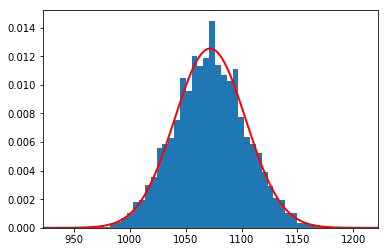

In [6]:
plt.hist(counter, bins=50, density=True)
plt.plot(x, y, 'r', linewidth=2.0)
plt.xlim(mu-150, mu+150)
plt.show()